In [4]:
!pip3 install --no-deps fastai

  Using cached fastai-1.0.61-py3-none-any.whl (239 kB)


In [5]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [14]:
!pip3 install fastprogress

  Using cached fastprogress-0.2.3-py3-none-any.whl (12 kB)


ERROR: fastai 1.0.61 requires bottleneck, which is not installed.
ERROR: fastai 1.0.61 requires numexpr, which is not installed.
ERROR: fastai 1.0.61 requires nvidia-ml-py3, which is not installed.
ERROR: fastai 1.0.61 requires packaging, which is not installed.
ERROR: fastai 1.0.61 requires spacy>=2.0.18; python_version < "3.8", which is not installed.


In [16]:
path = untar_data(URLs.PETS); path

WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet')

In [17]:
path

WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet')

In [18]:

path.ls()

[WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images')]

In [19]:
path_anno = path/'annotations'
path_img = path/'images'

In [21]:
fnames = get_image_files(path_img)
fnames[:9]

[WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),
 WindowsPath('C:/Users/91958/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg')]

In [22]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [23]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

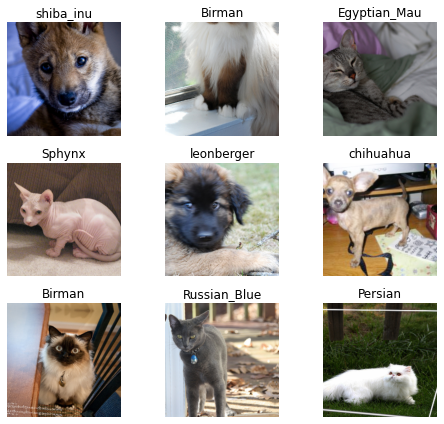

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [26]:
len(data.classes)

37

In [27]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.406080,0.325560,0.102842,02:28
1,0.597912,0.296863,0.087957,02:22
2,0.380352,0.271822,0.081867,02:19
3,0.262121,0.255469,0.074425,02:21


In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


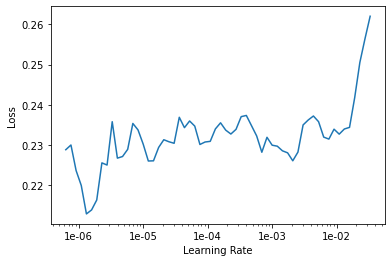

In [31]:
learn.recorder.plot()

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

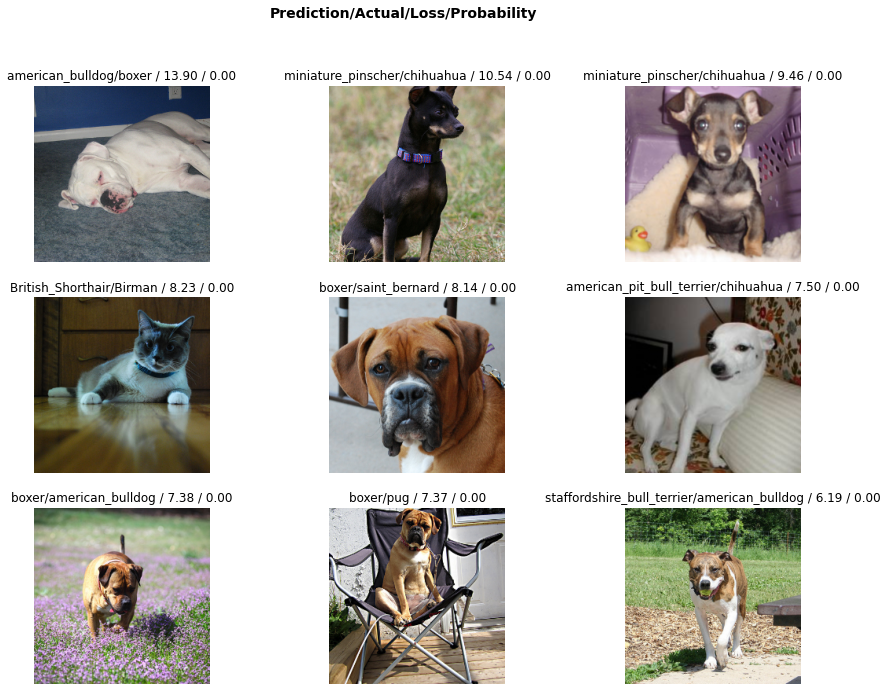

In [33]:
interp.plot_top_losses(9, figsize=(15,11))

In [34]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Birman', 'Ragdoll', 5),
 ('Maine_Coon', 'Ragdoll', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Siamese', 3),
 ('american_bulldog', 'boxer', 3),
 ('beagle', 'basset_hound', 3),
 ('chihuahua', 'american_pit_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('german_shorthaired', 'staffordshire_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american

In [35]:
learn.save('stage-1')

In [36]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\91958\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\91958\.fastai\data\oxford-iiit-pet\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (co

In [37]:

learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.265265,0.230742,0.071042,02:39
1,0.218808,0.229020,0.068336,02:37
